In [ ]:
import pandas as pd

In [ ]:
#read the dataset
insurance = pd.read_csv("insurance.csv")
data = insurance.copy() #orjinal veriyi bozmamak için kopyası üzerinde işlem yapıcam
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


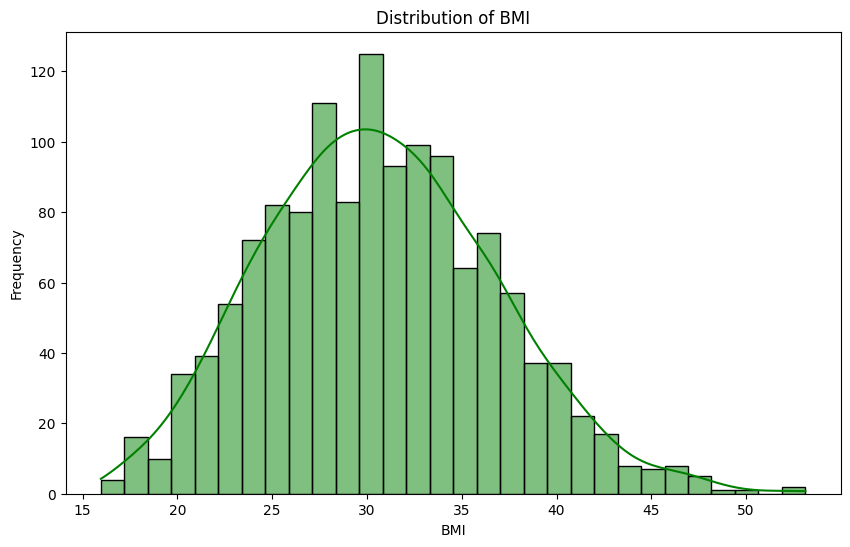

In [ ]:
#beden kütle indeksinin dağılımını incelemek için görselleştirdim.
#Burada görselleştirmek için matplotlib ve seaborn kütüphanelerini kullandım.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, bins=30, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency') #kaç kişinin o beden kütle index aralığında olduğunu gösteriyor
plt.show()
#bu görselleştirmeye göre kişiler daha çok 25-35 arası beden kütke indexine sahipler

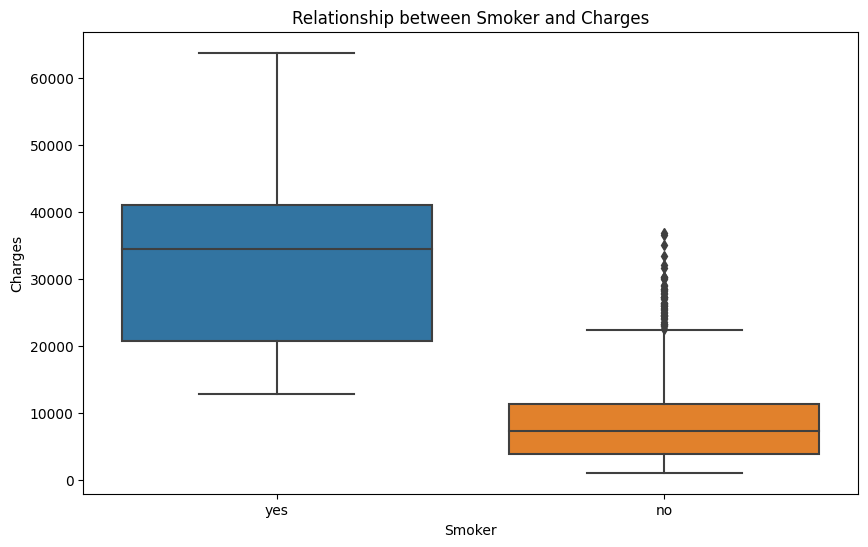

In [ ]:
#smoker olup olmaması categorical type ama charges numerical. Bu yüzden bunları incelemek için visualization daha uygun.
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Relationship between Smoker and Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
#burada sigara içenlerin charge miktarı daha fazla, yani daha fazla ücrete tabiiler

<Figure size 1000x600 with 0 Axes>

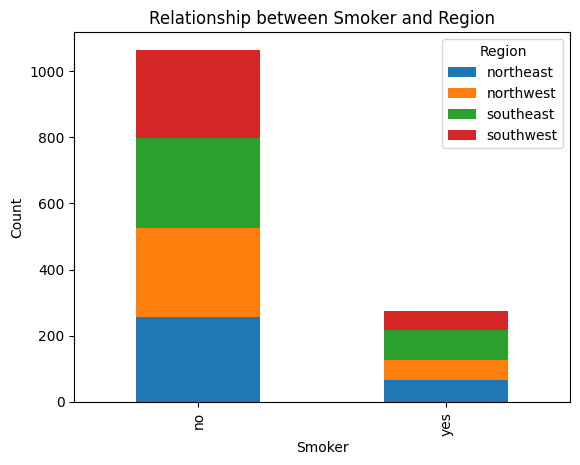

In [ ]:
contingency_table = pd.crosstab(data['smoker'], data['region'])
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Relationship between Smoker and Region')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.legend(title='Region')
plt.show()
#sigara içenler bölgelere göre dengeli bir dağılım gösterirken, içmeyemler southeast bölgesinde daha fazla sayıdalar

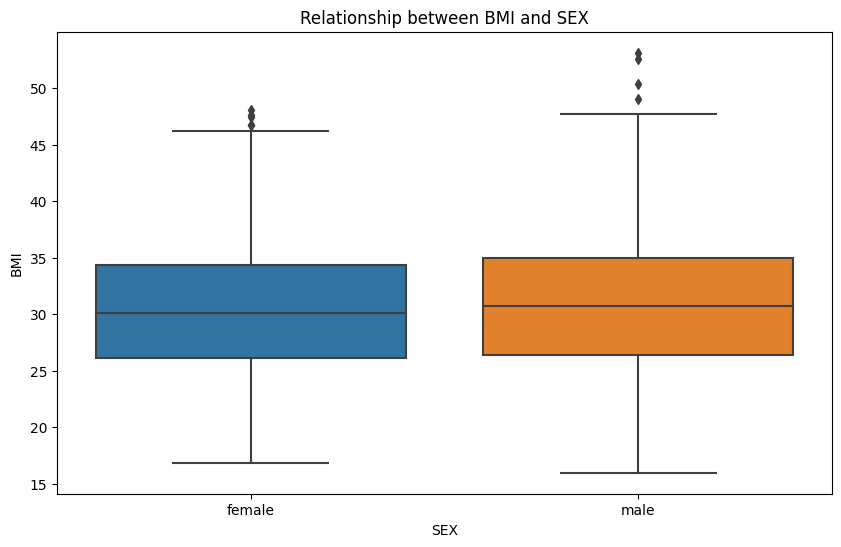

In [ ]:
#bir categorik ve bir numerik datayı kıyaslamak için boxplot kullandım,
#smoker ve chargesi kıyaslarken yaptığım gibi
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=data)
plt.title('Relationship between BMI and SEX')
plt.xlabel('SEX')
plt.ylabel('BMI')
plt.show()
#Beden kütle indexinin cinsyetlere göre değişimi çok farklılık göstermese de erkeklerin beden kütle indexi kadınlara göre biraz daha fazla

In [ ]:
#en çok çocuğun hangi bölgede olduğunu bulmak için önce regionları grup olarak ayırıp sonra her gruptaki yani bölgedeki çocuk sayısını toplayıp
#maksimum olanı bulamamız gerekir.
total_child_of_region = data.groupby('region')['children'].sum()
most_children_region = total_child_of_region.idxmax() #maksimum değere karşılık gelen bölgeyi döndürür, yani en çok çocuğun bulunduğu bölgeyi
most_children = total_child_of_region.max()
print(f"The region with the most children is {most_children_region} , children number is {most_children}. ")


The region with the most children is southeast , children number is 382. 


In [ ]:
#age ve bmi numerik değerler, aralarındaki ilişkiyi incelemek için correlation kullanabilirm.
correlation_value = data['age'].corr(data['bmi'])
correlation_value #correlation coefficient positive çıktı, yani aralarında linear bir ilişki var.




0.1092718815485352

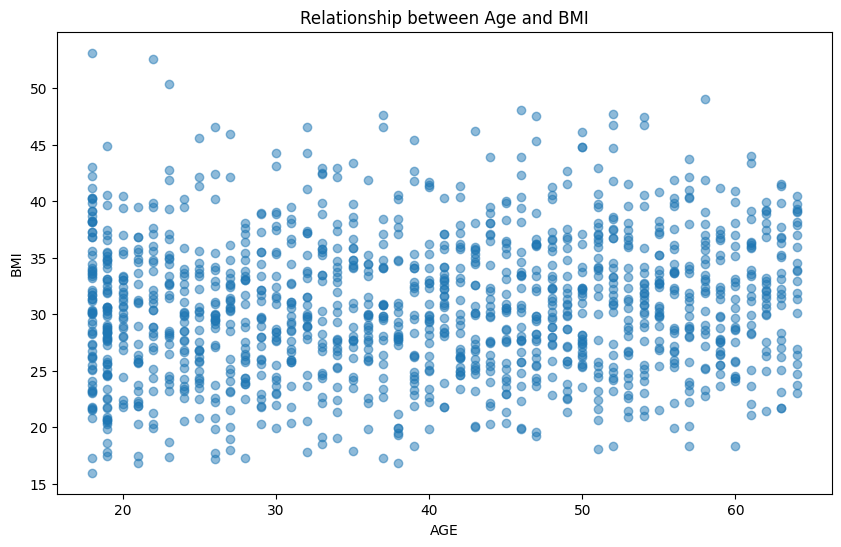

In [ ]:
#Eğer görselleştirerek incelemek istresek scatter plot kullanabiliriz
plt.figure(figsize=(10,6))
plt.scatter(data['age'], data['bmi'],alpha=0.5)
plt.title('Relationship between Age and BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()
#genel olarak dengeli bir dağılım var

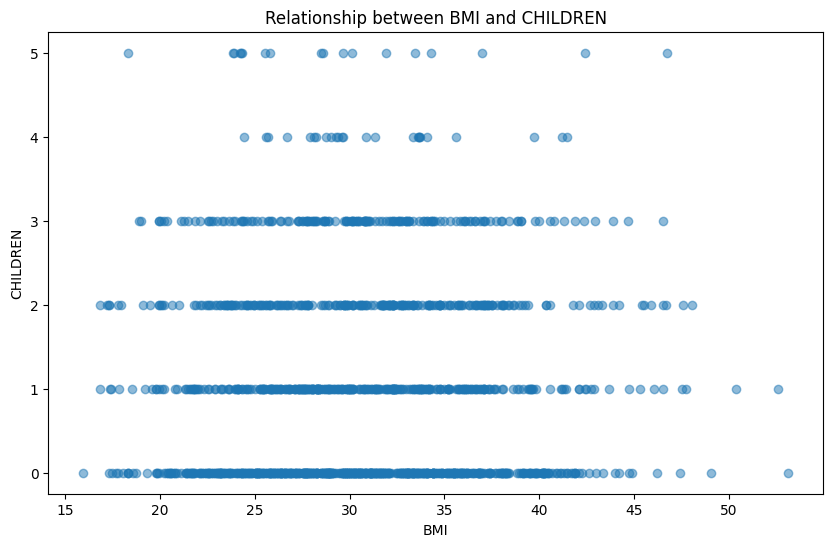

In [ ]:
#bmi ve children sayısı arasındaki ilişkiyi gözlemlemek için yine scatter plot kullanabilirz.
#Çünkü iki değer de numerik
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'], data['children'],alpha=0.5)
plt.title('Relationship between BMI and CHILDREN')
plt.xlabel('BMI')
plt.ylabel('CHILDREN')
plt.show()
#bu ilişkiden çıkarım yapamadım

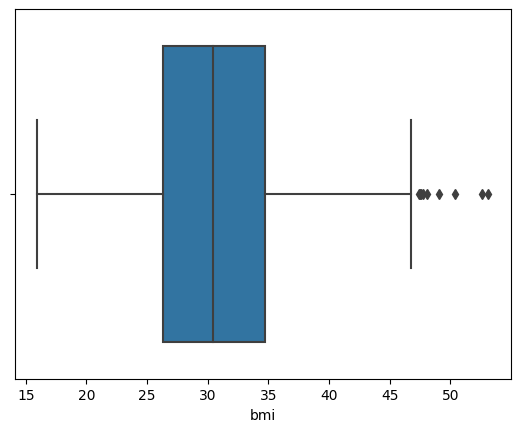

In [ ]:
#outlier ı gözlemlemek için boxplot kullanılır
sns.boxplot(x='bmi', data=data);
#aykırı değerler 25-35 bmi arası mevcut

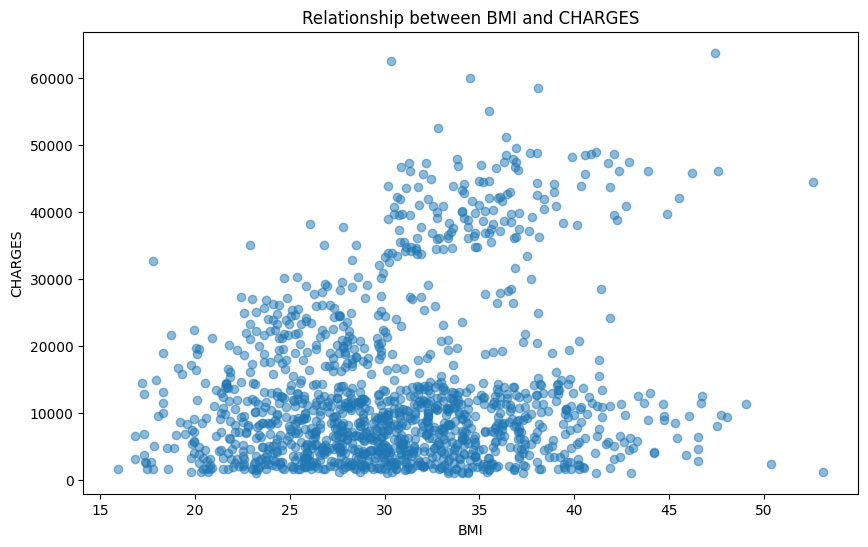

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'], data['charges'],alpha=0.5)
plt.title('Relationship between BMI and CHARGES')
plt.xlabel('BMI')
plt.ylabel('CHARGES')
plt.show()
#charges değerleri tüm bmi değerleri için 10000 civarında yoğunluk gösteriyor

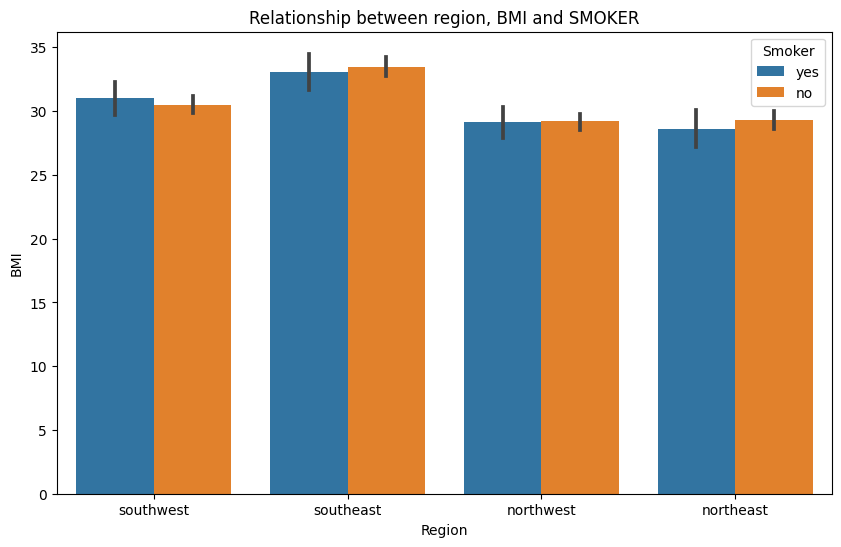

In [ ]:
#birkaç dğeri incelemek için bar plot kullanacağım
plt.figure(figsize=(10,6))
sns.barplot(x='region', y='bmi',hue='smoker', data=data)
plt.title('Relationship between region, BMI and SMOKER')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()
#southwest bölgesinde sigara kullananların bmi değerleri kullanmayanlara oranla daha yüksek iken, southeast bölgesinde bu durum tam tersidir.
#Northwest bölgesinde bireylerin sigara kullanıp kullanmamaları pek bir fark oluşturmazken, northeast bölgesinde sigara kullanmayanların bmi değerleri kullananlara oranla yüksektir.

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

#feature ve target valueleri ayırdım
X= data.drop("charges", axis=1)
y= data["charges"]
#categorik değerleri numerik e çevirdim
label_encoder = LabelEncoder()
X["sex"]=label_encoder.fit_transform(X["sex"])
X["smoker"]=label_encoder.fit_transform(X["smoker"])
X["region"]=label_encoder.fit_transform(X["region"])


In [ ]:
#her bir region categorisi için one-hot encoding kullanarak ayrı ikili sütünlar oluşturdum.
region_encoder= pd.get_dummies(X["region"], prefix="region")
X = pd.concat([X, region_encoder], axis=1)
X.drop("region",axis=1, inplace=True)

In [ ]:
#dataseti bölüyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#standart scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#model seçimi
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
lasso_model= Lasso()
ridge_model= Ridge()

#modellerin performanslarını koymak için dictionary oluşturdum
model_performance = {}

linear_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
model_performance["Linear Regression"] = np.sqrt(-linear_scores.mean())

lasso_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
model_performance["Lasso Regression"] = np.sqrt(-lasso_scores.mean())

ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
model_performance["Ridge Regression"] = np.sqrt(-ridge_scores.mean())

#her modelin performansını ekrana yazdır
for model_name, rmse_score in model_performance.items():
  print(f"{model_name}: RMSE= {rmse_score:.2f}")

#minimum error veren model en iyisidir
best_model = min(model_performance, key=model_performance.get)
print(f"Best model is: {best_model}")


Linear Regression: RMSE= 6150.74
Lasso Regression: RMSE= 6150.65
Ridge Regression: RMSE= 6150.62
Best model is: Ridge Regression


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_parameters= {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'solver': ['auto','svd', 'cholesky','lsqr','sparse_cg', 'sag', 'saga']}

ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, grid_parameters, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)
print("Best hyperparameters: ",grid_search.best_params_)
print("Best rmse:",np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best hyperparameters:  {'alpha': 1, 'solver': 'sag'}
Best rmse: 6150.487395446585


In [ ]:
from sklearn.metrics import mean_absolute_error
#çalışmaları en iyi model üzerinden yaptım
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

#error değerlerini hesaplama
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 33642360.29
Root Mean Squared Error (RMSE): 5800.20
Mean Absolute Error (MAE): 4188.09
